# **Error Correction with the Shor Code**
---

## **Introduction** 
This project exhibits the implementation, simulation, and analysis on the first ever error correction code proposed that can handle *any* single qubit errors (bit-flips, phase-flips, or others) using the Shor code (Sho95).

<br>

## **Description**
The Shor code is a natural extension of the Bit- and Phase- flip codes that avoid syndrome measurements where:

* A **bit-flip error** means $|0\rangle$ unintentionally turning into $|1\rangle$ or vice versa.
* A **phase-flip error** means $|+\rangle$ unintentionally turning into $|-\rangle$ or vice versa.

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

<br>

## **Key Questions**
In this project, we will answer the following questions:
1. How does using the Shor code compare to using no error correction? Are there any trends to notice?

1. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?

1. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?

<br>

## **Structure**
This project is broken into 3 parts:
> **Part 1**: Defining the Components
>
>> **Part 1.1**: The Phase-Flip Code
>>
>> **Part 1.2**: The Bit-Flip Code
>
> **Part 2**: Implementing the Shor Code
>
> **Part 3**: Analyzing the Shor Code
>
> **Wrapping Up**

<br>

## **Resources**
* [Qiskit's `circuit.compose(...)` function documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html)
* [Qiskit's `Statevector(...)` documentation](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html)
* [Quantum Error Correction for Beginners](https://arxiv.org/pdf/0905.2794.pdf)
* [Scheme for reducing decoherence in quantum computer memory](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.R2493): The original paper from by Shor proposing this code (behind a paywall)

---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [1]:
#!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

from random import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## **Part 1: Defining the Components**
---

In this section, we will define the key components of the Shor code through these parts:

**Part 1.1**: The 3-qubit phase-flip code.

**Part 1.2**: The 3-qubit bit-flip code.

---
### **Part 1.1: The Phase-Flip Code**


In this section, we will define two circuits pertaining to the phase-flip code:
1. `phaseflip_encode`: A 3-qubit phase-flip logical to physical encoding.
1. `phaseflip_correct`: A 3-qubit phase-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `phaseflip_encode` circuit that encodes a logical state into a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [2]:
phaseflip_encode = QuantumCircuit(3)

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [3]:
phaseflip_encode.cx(0, 1)
phaseflip_encode.cx(0, 2)

##### **3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

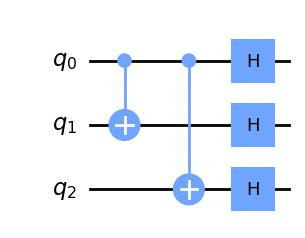

In [4]:
phaseflip_encode.h(0)
phaseflip_encode.h(1)
phaseflip_encode.h(2)

phaseflip_encode.draw()

#### **Exercise #2**

Create the `phaseflip_correct` circuit that detects and corrects errors in a 3-qubit phase-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [5]:
phaseflip_correct = QuantumCircuit(3)

##### **2. Detect any errors by checking that the phases of the 3 qubits match using H gates and CNOTs.**



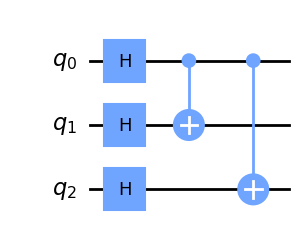

In [6]:
phaseflip_correct.h(0)
phaseflip_correct.h(1)
phaseflip_correct.h(2)

phaseflip_correct.cx(0, 1)
phaseflip_correct.cx(0, 2)

phaseflip_correct.draw()

##### **3. Correct any errors using a Toffoli gate.**



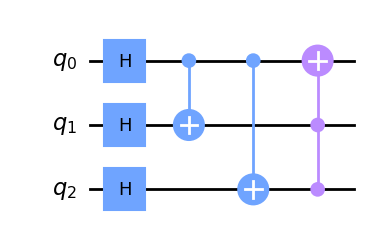

In [7]:
phaseflip_correct.ccx(2, 1, 0)

phaseflip_correct.draw()

#### **Exercise #3**

Simulate the full phase-flip code for the $|+\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Qiskit's `.compose(...)` function allows us to combine different circuits in a number of ways. We will use this throughout the notebook to build up a full Shor code, but since this is the first time you are seeing it we have provided it for you.

**Run the code below to compose the encoding and correcting circuits.**

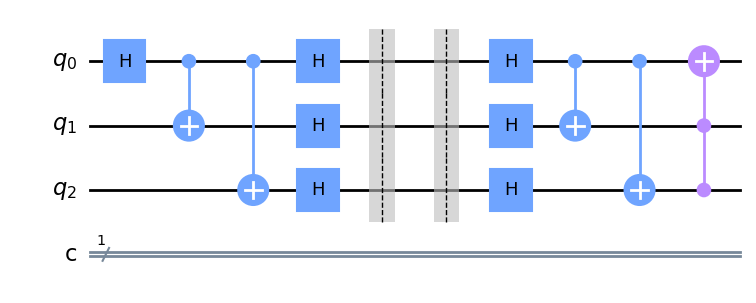

In [8]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [9]:
initial_state.equiv(final_state)

True

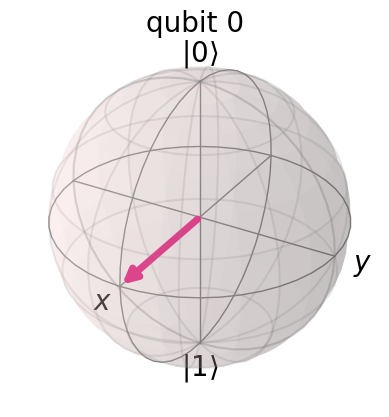

In [10]:
initial_state.draw(output = 'bloch')

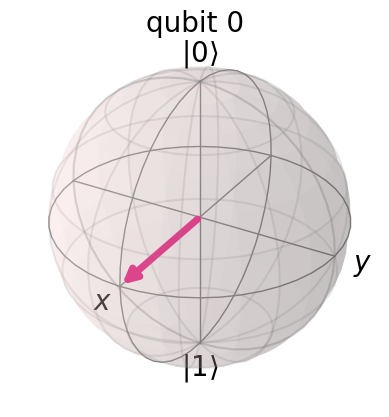

In [11]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full phase-flip code for the $|-\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

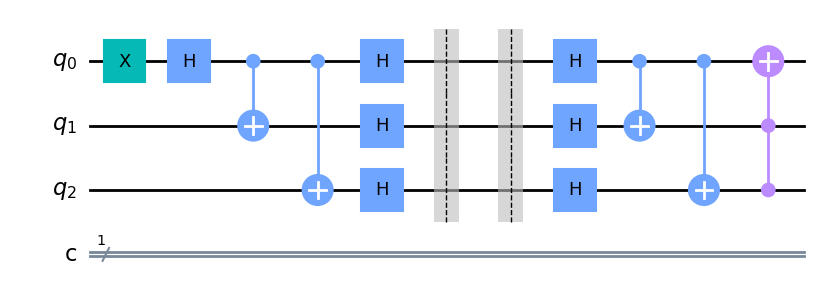

In [12]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# NONE IN THIS CASE

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [13]:
initial_state.equiv(final_state)

True

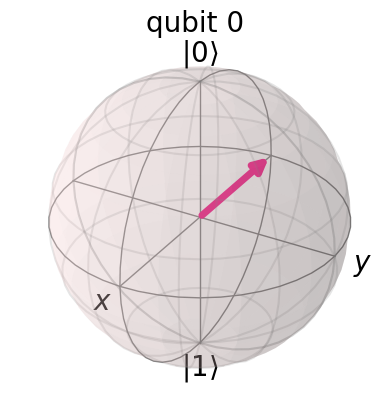

In [14]:
initial_state.draw(output = 'bloch')

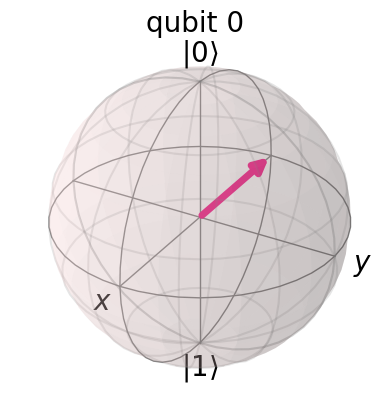

In [15]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full phase-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

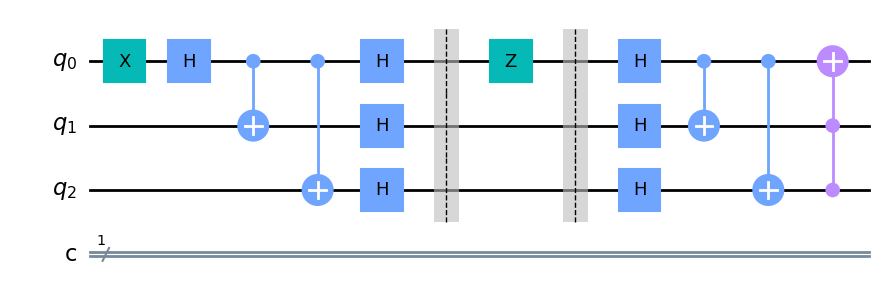

In [16]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
phaseflip_error = QuantumCircuit(3, 1)
phaseflip_error.z(0)

full_code = full_code.compose(phaseflip_error, qubits = [0, 1, 2])
full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [17]:
initial_state.equiv(final_state)

True

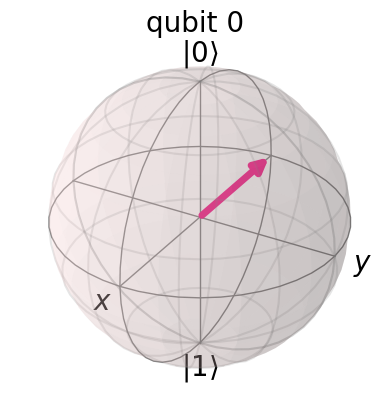

In [18]:
initial_state.draw(output = 'bloch')

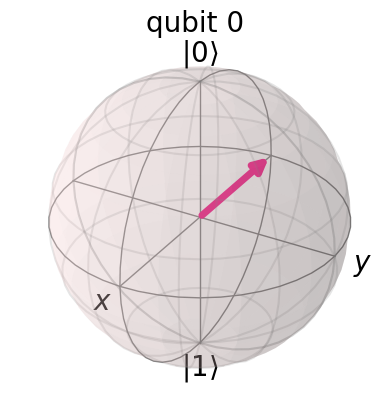

In [19]:
final_state.draw(output = 'bloch')

#### **Exercise #6**

Simulate the full phase-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

**NOTE**: This is identical to Exercise #4, except a phase-flip error is introduced. Consult previous work or other resources to determine how to implement a phase-flip error in a quantum circuit.

##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

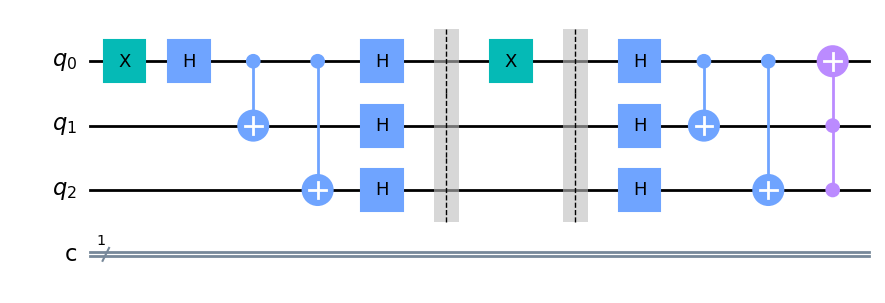

In [20]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(phaseflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
phaseflip_error = QuantumCircuit(3, 1)
phaseflip_error.x(0)

full_code = full_code.compose(phaseflip_error, qubits = [0, 1, 2])
full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(phaseflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [21]:
initial_state.equiv(final_state)

False

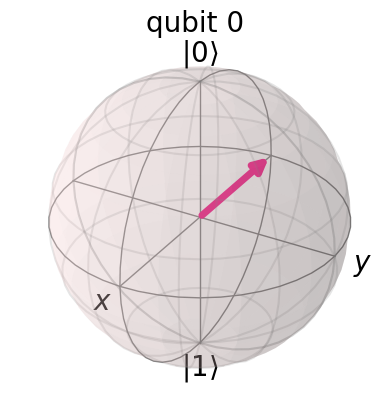

In [22]:
initial_state.draw(output = 'bloch')

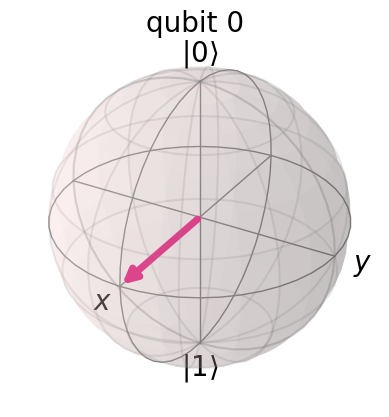

In [23]:
final_state.draw(output = 'bloch')

---
### **Part 1.2: The Bit-Flip Code**


In this section, we will define two circuits pertaining to the bit-flip code:
1. `bitflip_encode`: A 3-qubit bit-flip logical to physical encoding.
1. `bitflip_correct`: A 3-qubit bit-flip physical error detection and correction circuit.


#### **Exercise #1**

Create the `bitflip_encode` circuit that encodes a logical state into a 3-qubit bitflip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other qubits.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [24]:
bitflip_encode = QuantumCircuit(3, 1)

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [25]:
bitflip_encode.cx(0, 1)
bitflip_encode.cx(0, 2)

#### **Exercise #2**

Create the `bitflip_correct` circuit that detects and corrects errors in a 3-qubit bit-flip code. Specifically,

1. Initialize a circuit with 3 qubits.

2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.

3. Correct any errors using a Toffoli gate.

##### **1. Initialize a circuit with 3 qubits.**

The first qubit, $q_0$, will be the qubit we are correcting. The second and third qubits, $q_1$ and $q_2$, will be ancillary qubits used for correcting the first qubit.

In [26]:
bitflip_correct = QuantumCircuit(3, 1)

##### **2. Detect any errors by checking that the parity of the 3 qubits match using CNOTs.**



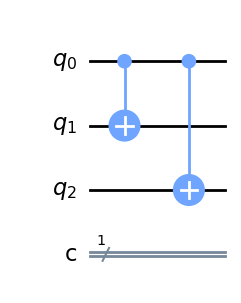

In [27]:
bitflip_correct.cx(0, 1)
bitflip_correct.cx(0, 2)

bitflip_correct.draw()

##### **3. Correct any errors using a Toffoli gate.**



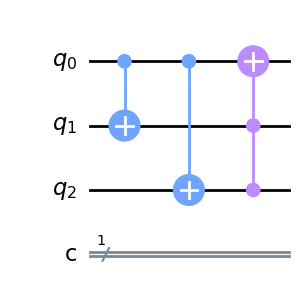

In [28]:
bitflip_correct.ccx(2, 1, 0)

bitflip_correct.draw()

#### **Exercise #3**

Simulate the full bit-flip code for the $|0\rangle$ state without errors as follows:
1. Combine the encoding and correcting circuits using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

Adapt this step from the phase-flip code developed in Part 1.1 for the bit-flip code we have developed just above. 

**NOTE**: This is almost entirely just a changle of variable names.

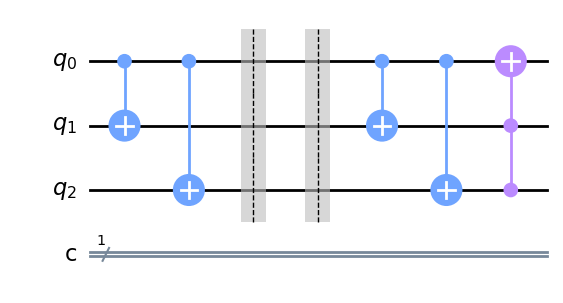

In [29]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
# No errors

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [30]:
initial_state.equiv(final_state)

True

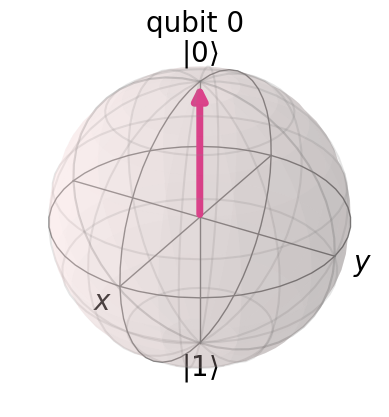

In [31]:
initial_state.draw(output = 'bloch')

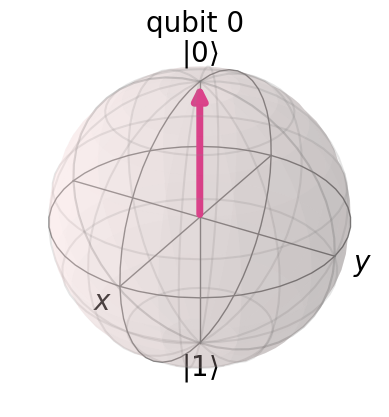

In [32]:
final_state.draw(output = 'bloch')

#### **Exercise #4**

Simulate the full bit-flip code for the $|-\rangle$ state with a *bit-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the bit-flip error, and the correcting circuit using `.compose(...)`.**

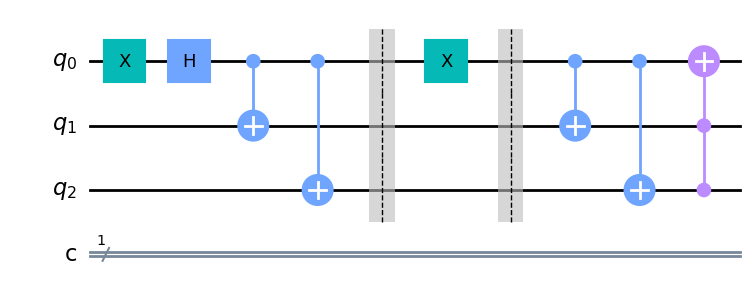

In [33]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
bitflip_error = QuantumCircuit(3, 1)
bitflip_error.x(0)

full_code = full_code.compose(bitflip_error, qubits = [0, 1, 2])
full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [34]:
initial_state.equiv(final_state)

True

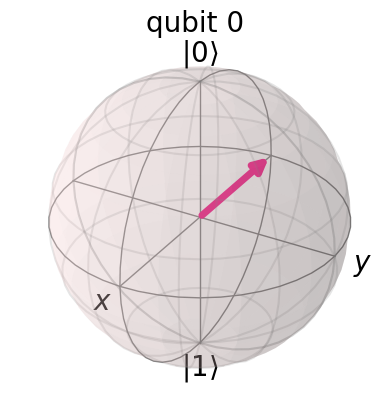

In [35]:
initial_state.draw(output = 'bloch')

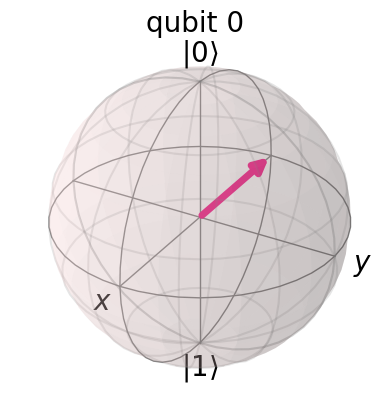

In [36]:
final_state.draw(output = 'bloch')

#### **Exercise #5**

Simulate the full bit-flip code for the $|-\rangle$ state with a *phase-flip error* on qubit 0 as follows:
1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.
1. Compare the initial and final statevector.

##### **1. Combine the encoding circuit, the phase-flip error, and the correcting circuit using `.compose(...)`.**

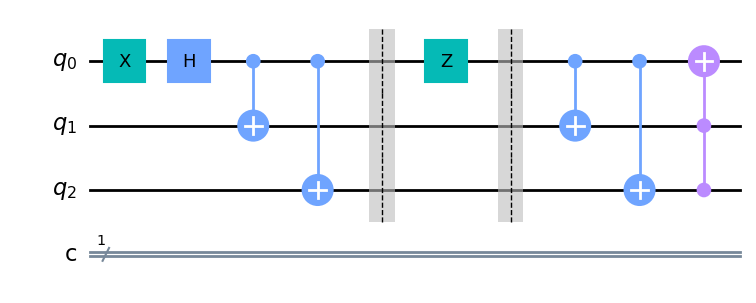

In [37]:
full_code = QuantumCircuit(3, 1)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
# print(initial_state)
initial_state = partial_trace(initial_state, [1, 2]).to_statevector()
# print(initial_state)

full_code = full_code.compose(bitflip_encode, qubits = [0, 1, 2])
full_code.barrier()


#==========
# ERRORS
#==========
phaseflip_error = QuantumCircuit(3, 1)
phaseflip_error.z(0)

full_code = full_code.compose(phaseflip_error, qubits = [0, 1, 2])
full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(bitflip_correct, qubits = [0, 1, 2])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
# print(final_state)
final_state = partial_trace(final_state, [1, 2]).to_statevector()
# print(final_state)

full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [38]:
initial_state.equiv(final_state)

False

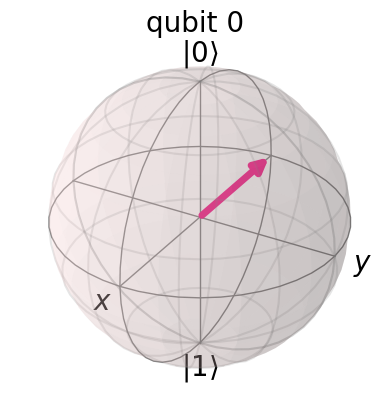

In [39]:
initial_state.draw(output = 'bloch')

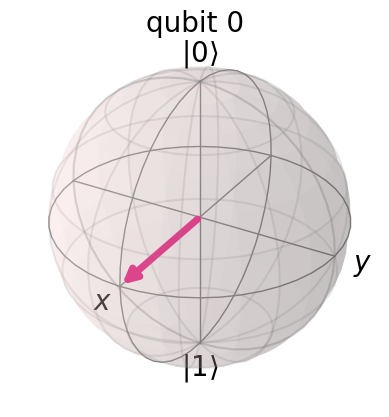

In [40]:
final_state.draw(output = 'bloch')

## **Part 2: Implementing the Shor Code**
---

In this section, we will build on the work from the last section to implement Shor's code in full.

### **Exercise #1**

Initialize a circuit with the correct number of qubits. It is up to you to determine the correct number based on the description of the code below and any other resources at your disposal.

<br>

This code can be viewed as two levels of quantum error correction where:
1. The logical qubits are first encoded into a 3-qubit phase-flip code.
1. Each of the resulting physical qubits are encoded into a 3-qubit bit-flip code.

In [41]:
shor_encode = QuantumCircuit(9, 1)

### **Exercise #2**

Complete the code below using every 3rd qubit for the phase-flip code.

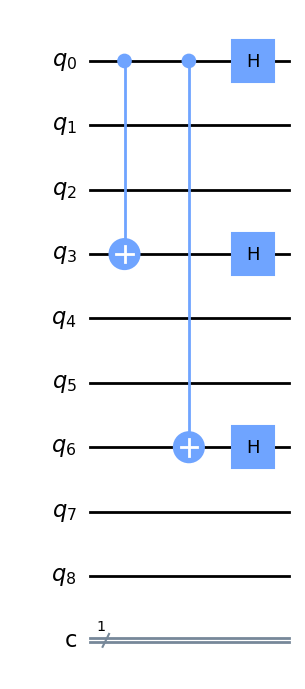

In [42]:
shor_encode = shor_encode.compose(phaseflip_encode, qubits = [0, 3, 6])
shor_encode.draw()

### **Exercise #3**

Complete the code below to encode each of the phase-flip code qubits using their own bit-flip code.

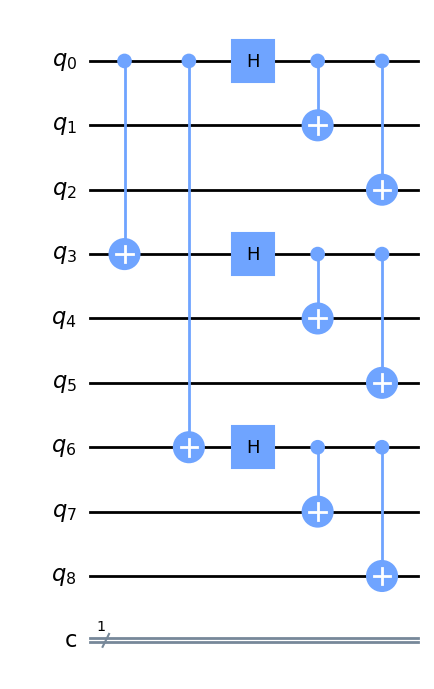

In [43]:
shor_encode = shor_encode.compose(bitflip_encode, qubits = [0, 1, 2])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [3, 4, 5])
shor_encode = shor_encode.compose(bitflip_encode, qubits = [6, 7, 8])
shor_encode.draw()

### **Exercise #4**

Now, initialize the correcting circuit with the correct number of qubits.

In [44]:
shor_correct = QuantumCircuit(9, 1)

### **Exercise #5**

For the same qubits that you encoded in Exercise #3, correct any bit-flips.

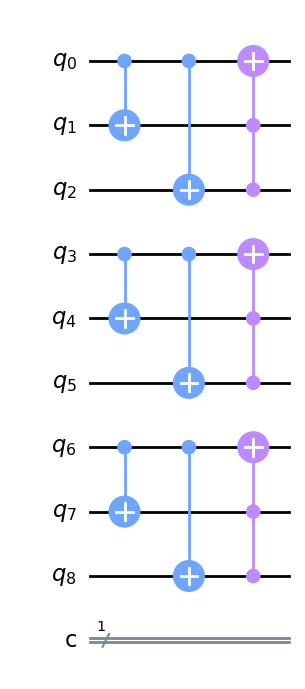

In [45]:
shor_correct = shor_correct.compose(bitflip_correct, qubits = [0, 1, 2])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [3, 4, 5])
shor_correct = shor_correct.compose(bitflip_correct, qubits = [6, 7, 8])

shor_correct.draw()

### **Exercise #6**

For the same qubits that you encoded in Exercise #2, correct any phase-flips.

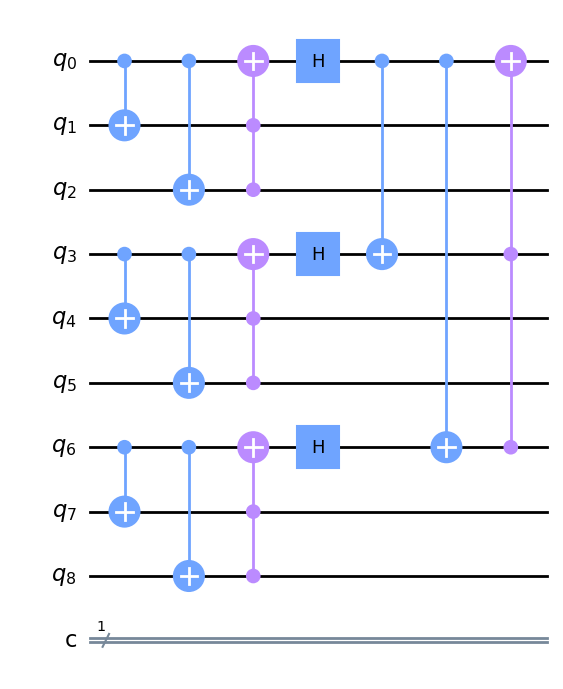

In [46]:
shor_correct = shor_correct.compose(phaseflip_correct, qubits = [0, 3, 6])
shor_correct.draw()

### **Exercise #7**

**Verify your implementation is correct by running the code below.**

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

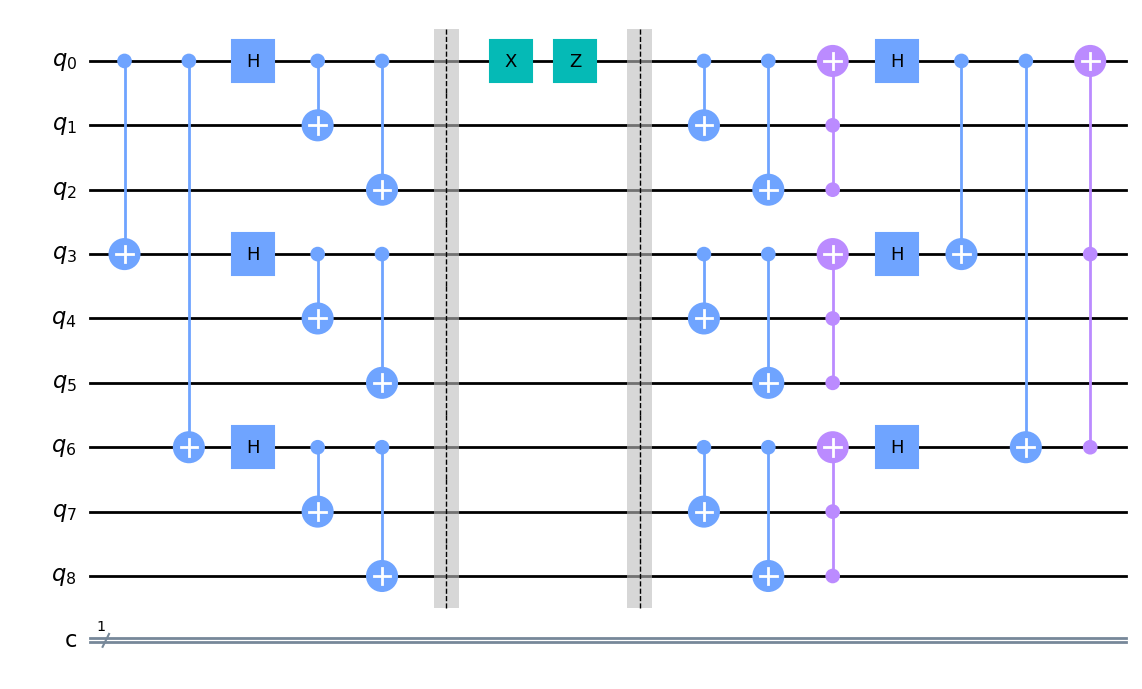

In [47]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [48]:
initial_state.equiv(final_state)

True

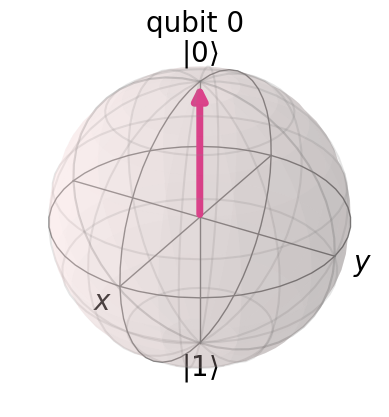

In [49]:
initial_state.draw(output = 'bloch')

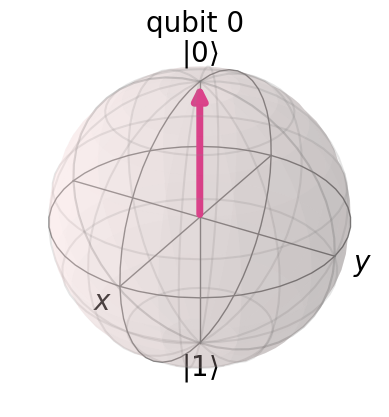

In [50]:
final_state.draw(output = 'bloch')

### **Exercise #8**

By only adjusting the qiskit code in the ERRORS section, determine a way to break this error correcting code (there are many solutions). For reference, there are actually 2 valid ways to break this code: 
1. The qiskit code runs, but the initial and final states do not match.
2. The qiskit code itself doesn't run and gives the following output: ```QiskitError: 'Density matrix is not a pure state'```. 



**NOTE**: If you're curious, the second error is a sign of a change in the quantum state so serious that the qiskit function for creating the statevector effectively fails. In quantum physics, this particular change is called going from a "pure state" to a "mixed state".

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

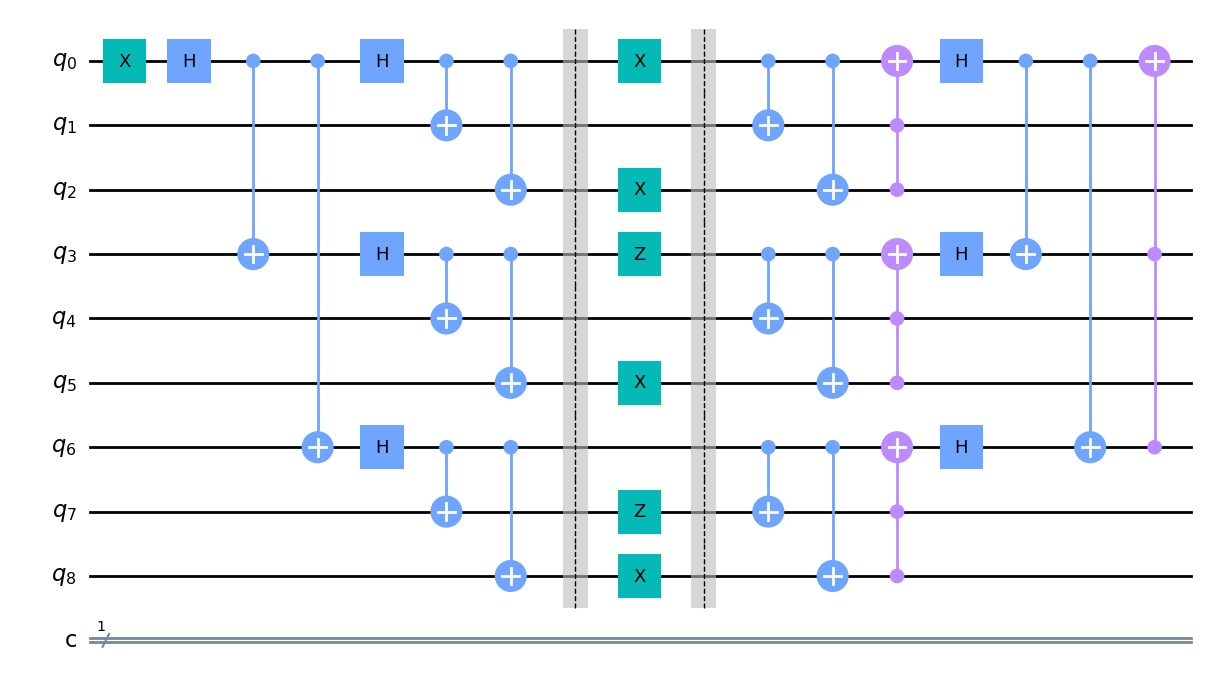

In [51]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector

full_code.x(0)
full_code.h(0)

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

full_code.x(0)
full_code.x(2)
full_code.z(3)
full_code.x(5)
full_code.z(7)
full_code.x(8)



full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [52]:
initial_state.equiv(final_state)

False

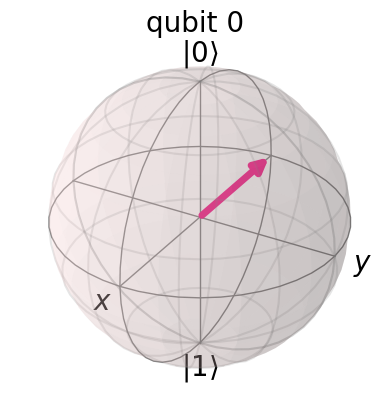

In [53]:
initial_state.draw(output = 'bloch')

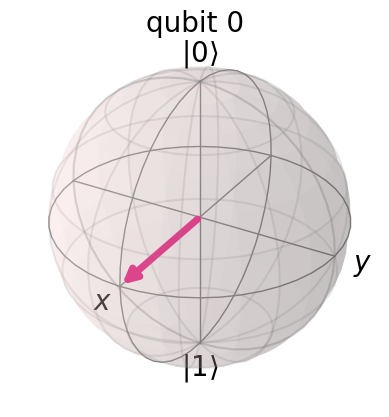

In [54]:
final_state.draw(output = 'bloch')

### **Exercise #9**

Simulate the Shor code for bit and phase-flip errors that occur 10% of the time.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**

The code below introduces bit and phase-flip errors 50% of the time. Change the necesssary line(s) so that these errors only occur 10% of the time.

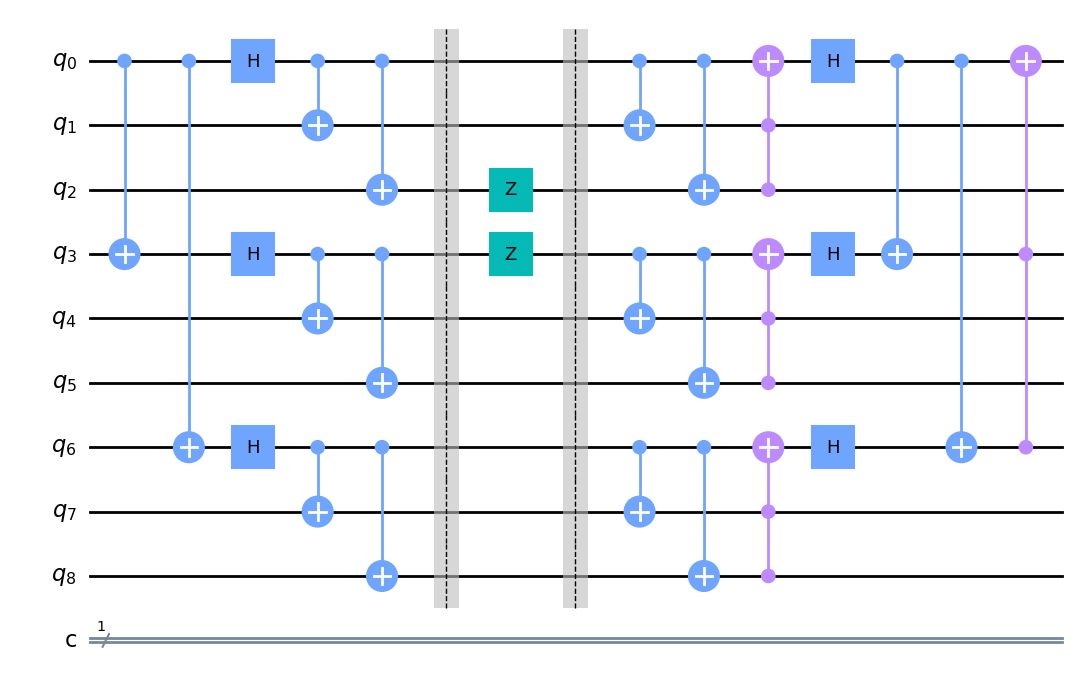

In [55]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < 0.10:
    full_code.x(i)
  if random() < 0.10:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()

##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [56]:
initial_state.equiv(final_state)

False

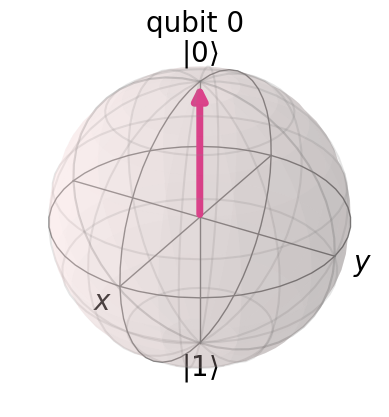

In [57]:
initial_state.draw(output = 'bloch')

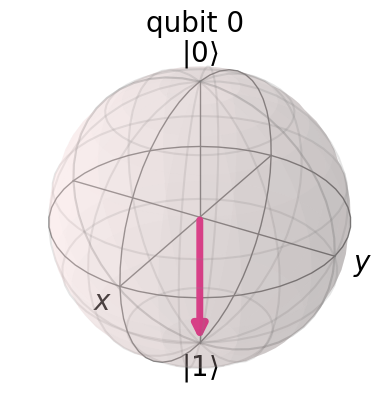

In [58]:
final_state.draw(output = 'bloch')

### **Exercise #10**

Adjust the code from Exercise #9 to use the variable provided for the probability of an error instead of hardcoding it in.

##### **1. Combine the encoding and correcting circuits using `.compose(...)`.**



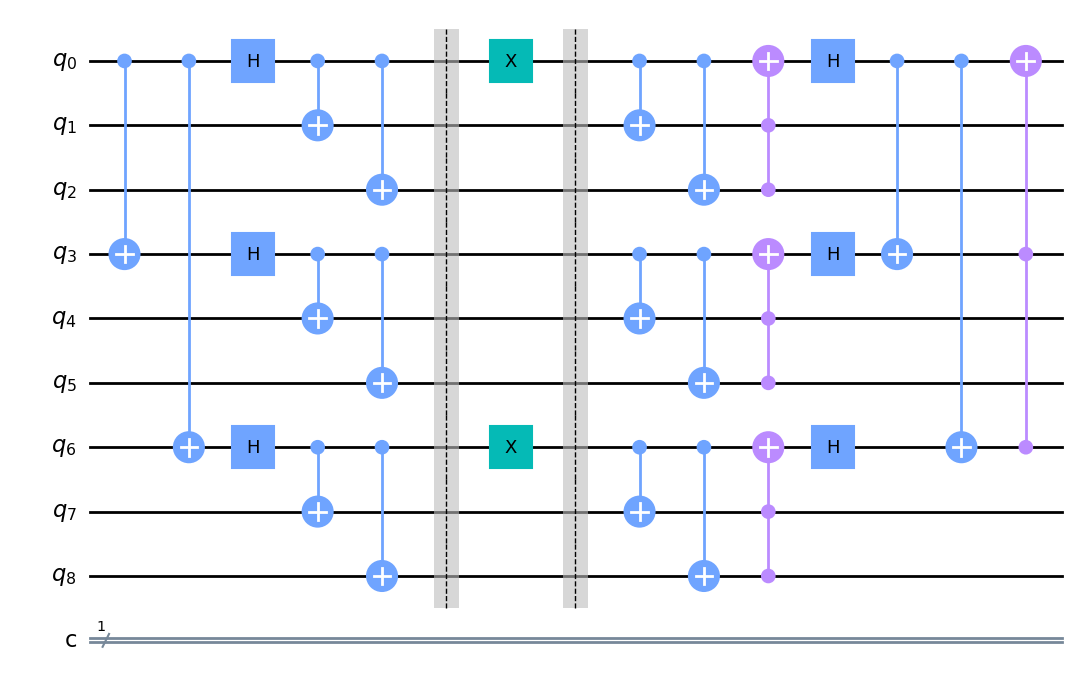

In [59]:
probability = 0.10

full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
full_code.draw()


##### **2. Compare the initial and final statevector.**

There are several ways to do this. We have provided two main ways below: using the `equiv(...)` function to calculate if they're equal and drawing the Bloch sphere of each for a visual comparison.



In [60]:
initial_state.equiv(final_state)

True

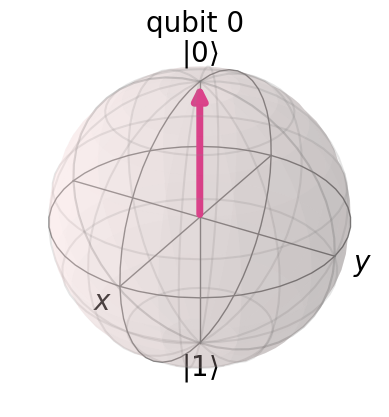

In [61]:
initial_state.draw(output = 'bloch')

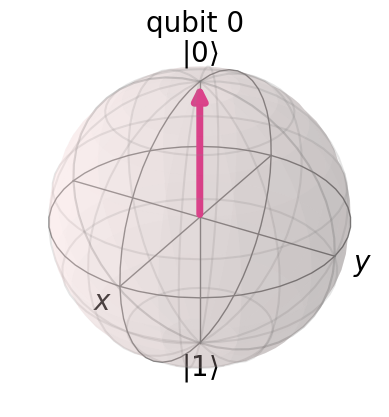

In [62]:
final_state.draw(output = 'bloch')

## **Part 3: Analzying the Shor Code**
---

In this section, we will learn how to analyze error correction simulations using a very important measurement in quantum physics: **state fidelity**. This measures how close two quantum states are to each other on a scale of 0 (completely different) to 1 (the same).

**Run the code below to calculate the fidelity between two qubits that are both in the $|0\rangle$ state (represented in vector notation).**

In [63]:
state_fidelity([1, 0], [1, 0])

1.0

### **Exercise #1**

Calculate the state fidelity between the $|0\rangle$ and $|1\rangle$ states.

In [64]:
state_fidelity([1, 0], [0, 1])

0.0

### **Exercise #2**

Calculate the state fidelity between the $|1\rangle$ and $|0\rangle$ states to determine if the order of states matters.

In [65]:
state_fidelity([0, 1], [1, 0])

0.0

### **Exercise #3**

Calculate the state fidelity between the $|0\rangle$ and $|+\rangle$ states.

**NOTE**: You may need to consult lessons from earlier in the year or other resources to determine the vector representation of the $|+\rangle state.

In [66]:
from math import sqrt
state_fidelity([1, 0], [1/sqrt(2), 1/sqrt(2)])

0.4999999999999999

### **Exercise #4**

Calculate the state fidelity between the $|0\rangle$ and $|-\rangle$ states.

In [67]:
state_fidelity([1, 0], [1/sqrt(2), -1/sqrt(2)])

0.4999999999999999

### **Exercise #5**

Complete the code below to calculate the state fidelity between the $|1\rangle$ and $|-\rangle$ states.

In [68]:
qc = QuantumCircuit(1)
qc.x(0)
initial_state = Statevector.from_instruction(qc)

# COMPLETE THIS LINE
qc.h(0)
final_state = Statevector.from_instruction(qc)

state_fidelity(initial_state, final_state)

0.4999999999999999

### **Exercise #6**

Write code to calculate the state fidelity between the $|00\rangle$ and $|\beta_{00}\rangle = \frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$ states.

In [69]:
qc = QuantumCircuit(2)

initial_state = Statevector.from_instruction(qc)

qc.h(0)
qc.cx(0, 1)

final_state = Statevector.from_instruction(qc)

state_fidelity(initial_state, final_state)

0.4999999999999999

### **Exercise #7**

Write code to calculate the state fidelity between the initial and final states from Exercise #7 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: Given that these states are from before and after using an error correction scheme, do we want the state fidelity to be 0, 1, or something in between?

In [95]:
full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========
full_code.x(0)
full_code.z(0)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
 
#full_code.draw()
print('State fidelity: ', state_fidelity(initial_state, final_state))

State fidelity:  1.0


**Question**: Given that these states are from before and after using an error correction scheme, do we want the state fidelity to be 0, 1, or something in between?

**Solution**: As these states are from before and after applying the error correction scheme, we would expect that the state fidelity to be 1. But, as we have seen that this error correction code can be broken and if the errors were different in the above code we might get something in between 0 and 1.

### **Exercise #8**

Write code to calculate the state fidelity between the initial and final states from Exercise #10 of Part 2. Specifically, copy and paste your solution below and modify it as needed.

**Question**: If the probability is increased, what tends to happen to the fidelity? Test this out by altering your solution below as needed.

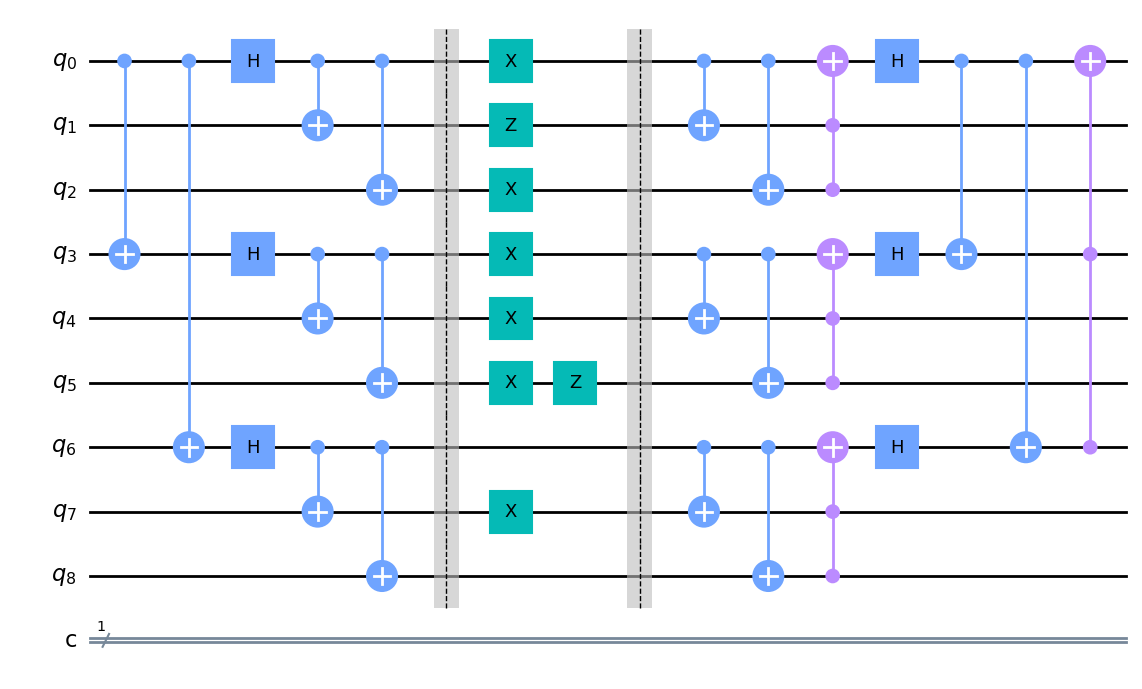

In [96]:
probability = 0.50

full_code = QuantumCircuit(9)

#==========
# ENCODING
#==========
# Prepare the initial state and save its statevector
# Prepare in the |0> state

initial_state = Statevector.from_instruction(full_code)
initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
full_code.barrier()


#==========
# ERRORS
#==========

for i in range(9):
  if random() < probability:
    full_code.x(i)
  if random() < probability:
    full_code.z(i)

full_code.barrier()


#==========================
# DETECTION AND CORRECTION
#==========================

full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Save the final statevector for comparison to the initial one
final_state = Statevector.from_instruction(full_code)
final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

full_code.draw()


In [97]:
print('State Fidelity: ', state_fidelity(initial_state, final_state))

State Fidelity:  3.680050034621245e-103


**Question**: If the probability is increased, what tends to happen to the fidelity? Test this out by altering your solution below as needed.

**Solution**: As the probability is increased, the state fidelity tends to 0. This is expected because as we increase the probablity, there will be more errors introduced in the circuit and hence the error correction seems to break. So, the initial and final state woudn't agree with each other. \
The weird thing I don't get is why the state fidlity output is always this constant number - 3.680050034621245e-103 when the circuit breaks.

### **Exercise #9**

Write a function that takes in a paramater, `probability`, and returns the fidelity before and after running the Shor code with errors that occur with the given probability.


**Hint**. This will look very similar to Exercise #8.

In [99]:
def get_fidelity(probability):

    full_code = QuantumCircuit(9)

    #==========
    # ENCODING
    #==========
    # Prepare the initial state and save its statevector
    # Prepare in the |0> state

    initial_state = Statevector.from_instruction(full_code)
    initial_state = partial_trace(initial_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()

    full_code = full_code.compose(shor_encode, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])
    full_code.barrier()


    #==========
    # ERRORS
    #==========

    for i in range(9):
      if random() < probability:
        full_code.x(i)
      if random() < probability:
        full_code.z(i)

    full_code.barrier()


    #==========================
    # DETECTION AND CORRECTION
    #==========================

    full_code = full_code.compose(shor_correct, qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8])

    # Save the final statevector for comparison to the initial one
    final_state = Statevector.from_instruction(full_code)
    final_state = partial_trace(final_state, [1, 2, 3, 4, 5, 6, 7, 8]).to_statevector()
    
    return state_fidelity(initial_state, final_state)

### **Exercise #10**

The code provided below graphs the *average* state fidelity using the Shor code with increasing probability of errors. You will use this to answer several final questions in your project summary.

**NOTE**: Be patient! This may take up to a minute to run since it is simulating many quantum circuits (technically `num_points` * `num_trials_per_point` circuits).

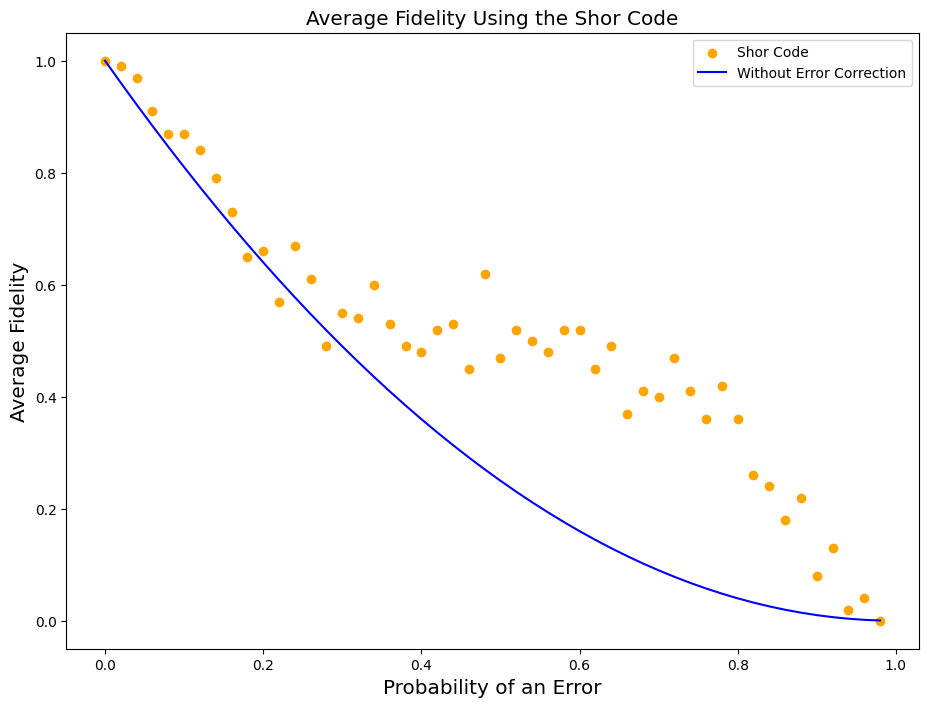

In [100]:
num_points = 50
num_trials_per_point = 100
average_fidelities_shor = []
probabilities = [p / num_points for p in range(num_points)]

for probability in probabilities:

  average_fidelity = 0
  for trial in range(num_trials_per_point):
    average_fidelity += get_fidelity(probability)

  average_fidelity /= num_trials_per_point
  
  average_fidelities_shor  += [average_fidelity]



plt.figure(figsize = (11, 8))
plt.scatter(probabilities, average_fidelities_shor, label = 'Shor Code', color = 'orange')
plt.plot(probabilities, [(1 - p)**2 for p in probabilities], label = 'Without Error Correction', color = 'blue')


plt.title("Average Fidelity Using the Shor Code", fontsize = 'x-large')
plt.xlabel("Probability of an Error", fontsize = 'x-large')
plt.ylabel("Average Fidelity", fontsize = 'x-large')
plt.legend()
plt.show()

## **Wrapping Up**

*Congratulations!* You have implemented and analyzed the Shor code in qiskit -- no small feat. To wrap up, please make sure to write a summary of the concepts covered here, including answers to the following questions:

1. How does using the Shor code compare to using no error correction? Are there any trends you notice?

 Plausible solution: 
 
   Without any error correction it makes sense for the state fidelity to tend to 0 as the probability of error increases i.e, tends to 1 as any error 
   occurred would hinder the original state. 
   Now, if we consider the data associated with Shor Code, we can see that:
   - when the probability is low, error correction works seamlessly and is able to correct those error which results in better state fidelity. 
   - when the probability is high, error correcton code breaks and we can see the state fidelity nearing to 0 for probabilties near to 1. 
   
   Most of the data points lie in between the error probabilites of 20% and 80%. Also, that the average fidelity for these probabilities lie in
   between 0.3 and 0.6. So with this I think we could say that with greater probabilities of errors Shors code is not fault tolerant.

2. When using the Shor code, how does the average fidelity change with increasing probability of errors? Why is this?
 
 Plausible solution:
 
   The average fidelity is generally decreasing with the increase in probability. An obvious explanation is that if the probability of error occurrence 
   increases, there are higher chances that even the ancillary qubits receive errors which challenges our assumption that ancillary qubits won't fall into
   errors. When this happens, the final state of our logical qubit would be quite different than the initial state which we wanted to protect using the  
   error correction scheme.
   
   Even in lectures we had seen that if there were errors in more than half of the anically qubits we would be reading the state of the logical qubit
   incorrectly.
   

3. Are there any unexpected patterns in the average fidelity? Why do you think they might be happening if so?

 Plausible solution:
 
   The Shor Code curve isn't smooth. Like there are sudden drops in the average fidelity near the boundaries of 0.2 and 0.8 probability. Also, it is 
   obserable that the average fidelity isnt't decreasing as steeply between the same probability boundaries. 
   
   My explanation is that, when the erros were introduced in the beginning (before probability of 0.2), this actually had an impact on the state (like a
   sudden change in the environment) and hence was observable as a steep decline in the fidelity. But, as the probability increased, new errors (X's and 
   Z's) got applied to other qubits, but these were like redundant. They had no major impact as much as the errors in the beginning did. Later when the 
   probablity almost reaches 1, it's like the whole circuit, all the qubits in it are experiencing erros which would definitely give us an unexpected 
   final state and hence such bad fidelity. 
   
   Its like 0.2 probability is the upper threshold before which the fidelity rate decreases suddenly and similarly 0.8 is the lower threshold after which 
   the fidelity rate decreases suddenly. In between, due to redundancy the errors kinda cancel out and hence the fidelity appears to be constant.
  
  
## **Summary**

To summarize this project notebook:
1. Firstly, we defined the individual components of phase-flip and bit-flip code. Basically, the encoding and correcting parts. During this, learned how to use the .compose() method to join newly created circuits to the ones previously defined. 
2. Then, we implemented the Shor code in which we defined the phase-flip encoding scheme first and then for each of the qubits used in phase-flip encoding, we covered them with a 3-qubit bit-flip error correction scheme which landed us a circuit with a total of 9 qubits. In between, many examples were used to help us understand the process of building the Shor Code.
3. Lastly, we understood what State Fidelity means and how the method .statevecotor() gives us the representation of the qubit states. This is measured before and after applying the error correction scheme to understand the deviation of the qubit states due to application of errors. Here, we played with probabilites, and analysed how increase in the probability of errors worsens the state fidelity.  


# End of Lab

---

© 2023 The Coding School, All rights reserved